<a href="https://colab.research.google.com/github/mangekkyo/Machine-learning/blob/main/Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1.

In [ ]:
#importing necessary libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import to_categorical,plot_model
from keras.datasets import mnist
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
#Loading dataset
import pathlib
d_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=tf.keras.utils.get_file('flower_photos.tar',origin=d_url,extract=True)
data_dir=pathlib.Path(data_dir).with_suffix('')

228813984/228813984 [==============================] - 1s 0us/step


In [ ]:
!pip install split-folders[full]
import splitfolders
splitfolders.ratio(data_dir,output="output",seed=1337,ratio=(0.8,0.2))

Copying files: 3670 files [00:01, 3213.99 files/s]


In [ ]:
#Splitting data
batch_size=32
img_height=224
img_width=224
train_ds=tf.keras.utils.image_dataset_from_directory(data_dir,validation_split=0.2,subset="training",seed=123,image_size=(img_height,img_width),batch_size=batch_size)
val_ds=tf.keras.utils.image_dataset_from_directory(data_dir,validation_split=0.2,subset="validation",seed=123,image_size=(img_height,img_width),batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


AttributeError: ignored

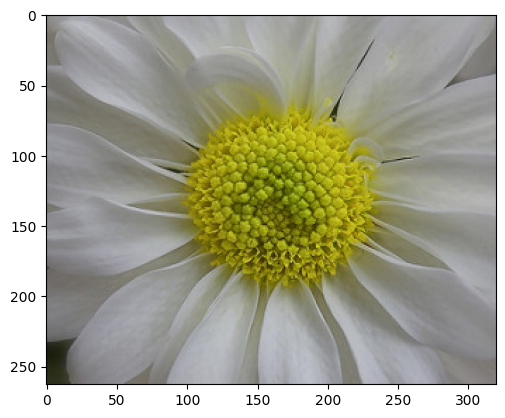

In [ ]:
#sample of image dataset
import matplotlib.pyplot as plt
im = plt.imread("/content/output/train/daisy/100080576_f52e8ee070_n.jpg")
plt.imshow(im)
plt.show()

In [ ]:
#rescaling
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import Xception
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    horizontal_flip = True,)
test_data = ImageDataGenerator(rescale = 1./255)
train_generator =train_data.flow_from_directory("/content/output/train",target_size = (224,224),batch_size = 32,class_mode = 'categorical')
validation_generator = test_data.flow_from_directory("/content/output/val",target_size = (224,224),batch_size = 32,class_mode = 'categorical')

Found 2934 images belonging to 5 classes.
Found 736 images belonging to 5 classes.


In [ ]:
#transfer learning- Xception
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import Xception
num_classes = 5
input_shape = (224,224,3)

Model1 = Xception(weights='imagenet',include_top = False, input_shape = (224,224,3))

for layer in Model1.layers:
  layer.trainable = False

x = Model1.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dense(256, activation='relu')(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model(Model1.input,output)

In [ ]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator,epochs = 2, validation_data = validation_generator)

Epoch 1/2
92/92 [==============================] - 50s 544ms/step - loss: 0.3789 - accuracy: 0.8589 - val_loss: 0.3565 - val_accuracy: 0.8818
Epoch 2/2
92/92 [==============================] - 50s 548ms/step - loss: 0.3428 - accuracy: 0.8742 - val_loss: 0.3395 - val_accuracy: 0.8641


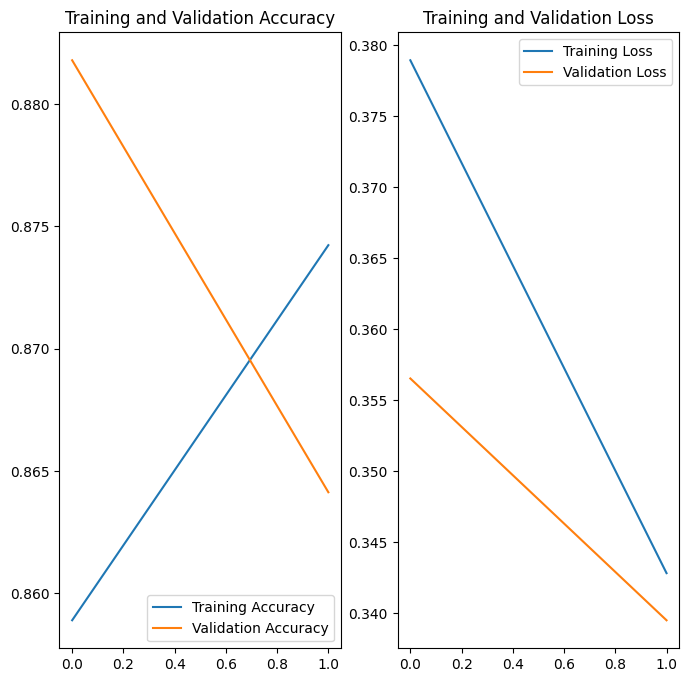

In [ ]:
epochs = 2
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

The training had better accuracy and lower loss compared to validation data. The performance of the model is excellent because of transfer learning and use of previously learnt patterns of Xception model.